#                            __Credit Card Customers Analysis__
<p> By Vaibhav, Harsh and Aryan

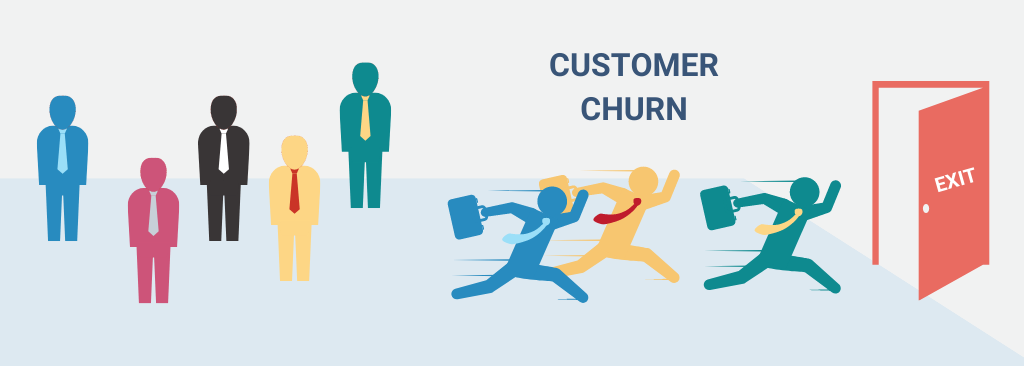

## Business Problem Statement 

A bank manager is uncomfortable with more and more customers leaving their credit card services. They would really appreciate it if someone could predict who will be affected so that they can proactively go to the customer to provide them with better services and turn customer decisions in the opposite direction.

## Goal
<P>This project involves the analysis of Credit card customer dataset which contains the information about 10127 Customer transaction.
<P>With this dataset, we have to make a Classification ML model to predict the Attrition customer.

## Data description

1. CLIENTNUM: Client number. Unique identifier for the customer holding the account

2. Customer_Age: Demographic variable - Customer's Age in Years

3. Gender: Demographic variable - M=Male, F=Female

4. Dependent_count: Demographic variable - Number of dependents

5. Education_Level: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)

6. Marital_Status: Demographic variable - Married, Single, Divorced, Unknown

7. Income_Category: Demographic variable - Annual Income Category of the account holder 

8. Card_Category: Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

9. Months_on_book: Period of relationship with bank

10. Total_Relationship_Count: Total no. of products held by the customer

11. Months_Inactive_12_mon: No. of months inactive in the last 12 months

12. Contacts_Count_12_mon: No. of Contacts in the last 12 months

13. Credit_Limit: Credit Limit on the Credit Card

14. Total_Revolving_Bal: Total Revolving Balance on the Credit Card

15. Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)

16. Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)

17. Total_Trans_Amt: Total Transaction Amount (Last 12 months)

18. Total_Trans_Ct: Total Transaction Count (Last 12 months)

19. Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)

20. Avg_Utilization_Ratio: Average Card Utilization Ratio

## IMPORTING LIBRARIES 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from adjustText import adjust_text
from scipy.stats import chi2_contingency
import scipy.stats 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import  roc_auc_score
import scikitplot as skplt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

## Importing Data
we will import our data and exclude our last 2 features as they are feature of some different model  and __CLIENTNUM__ feature (As it is a unique identifier in our dataset).

In [2]:
df = pd.read_csv("BankChurners.csv")
df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
                      , 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','CLIENTNUM'], inplace = True)

## CLEANING and PREPROCESSING

In [62]:
a = df.describe()

In [4]:
a = df.shape

In [5]:
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [6]:
a = df[df.duplicated()]

After doing some cleaning of our dataset we found out that we don't have any missing value, Null value and no duplicate rows in our dataset.

# EXPLORATORY DATA ANALYSIS

<p>Before EDA we first divide our dataset into Numerical (In Numerical we sub-divide into Discrete and Continuous feature) and Categorial feature. 
<p> As we can do group wise analysis of our dataset.

In [7]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O' ]
print("Number of Numerical feature:",len(numerical_feature))

Number of Numerical feature: 14


In [8]:
discrete_feature = [feature for feature in numerical_feature if len(df[feature].unique())<25]
print("Number of Discrete feature:",len(discrete_feature))

Number of Discrete feature: 4


In [9]:
df[discrete_feature].nunique()

Dependent_count             6
Total_Relationship_Count    6
Months_Inactive_12_mon      7
Contacts_Count_12_mon       7
dtype: int64

In [10]:
continuous_feature =[feature for feature in numerical_feature if feature not in discrete_feature]
print("Number of Continuous feature:",len(continuous_feature))

Number of Continuous feature: 10


In [11]:
categorical_feature = [feature for feature in df.columns if df[feature].dtypes == 'O' ]
print("Number of categorical feature:",len(categorical_feature))

Number of categorical feature: 6


So,we have 14 Numerical Feature and 6 Categorical feature. Now, let's start our analysis

## ANALYSIS OF CONTINOUS  AND DISCRETE FEATURES

For this we will plot histogram to see the distribution of of our continuous feature.

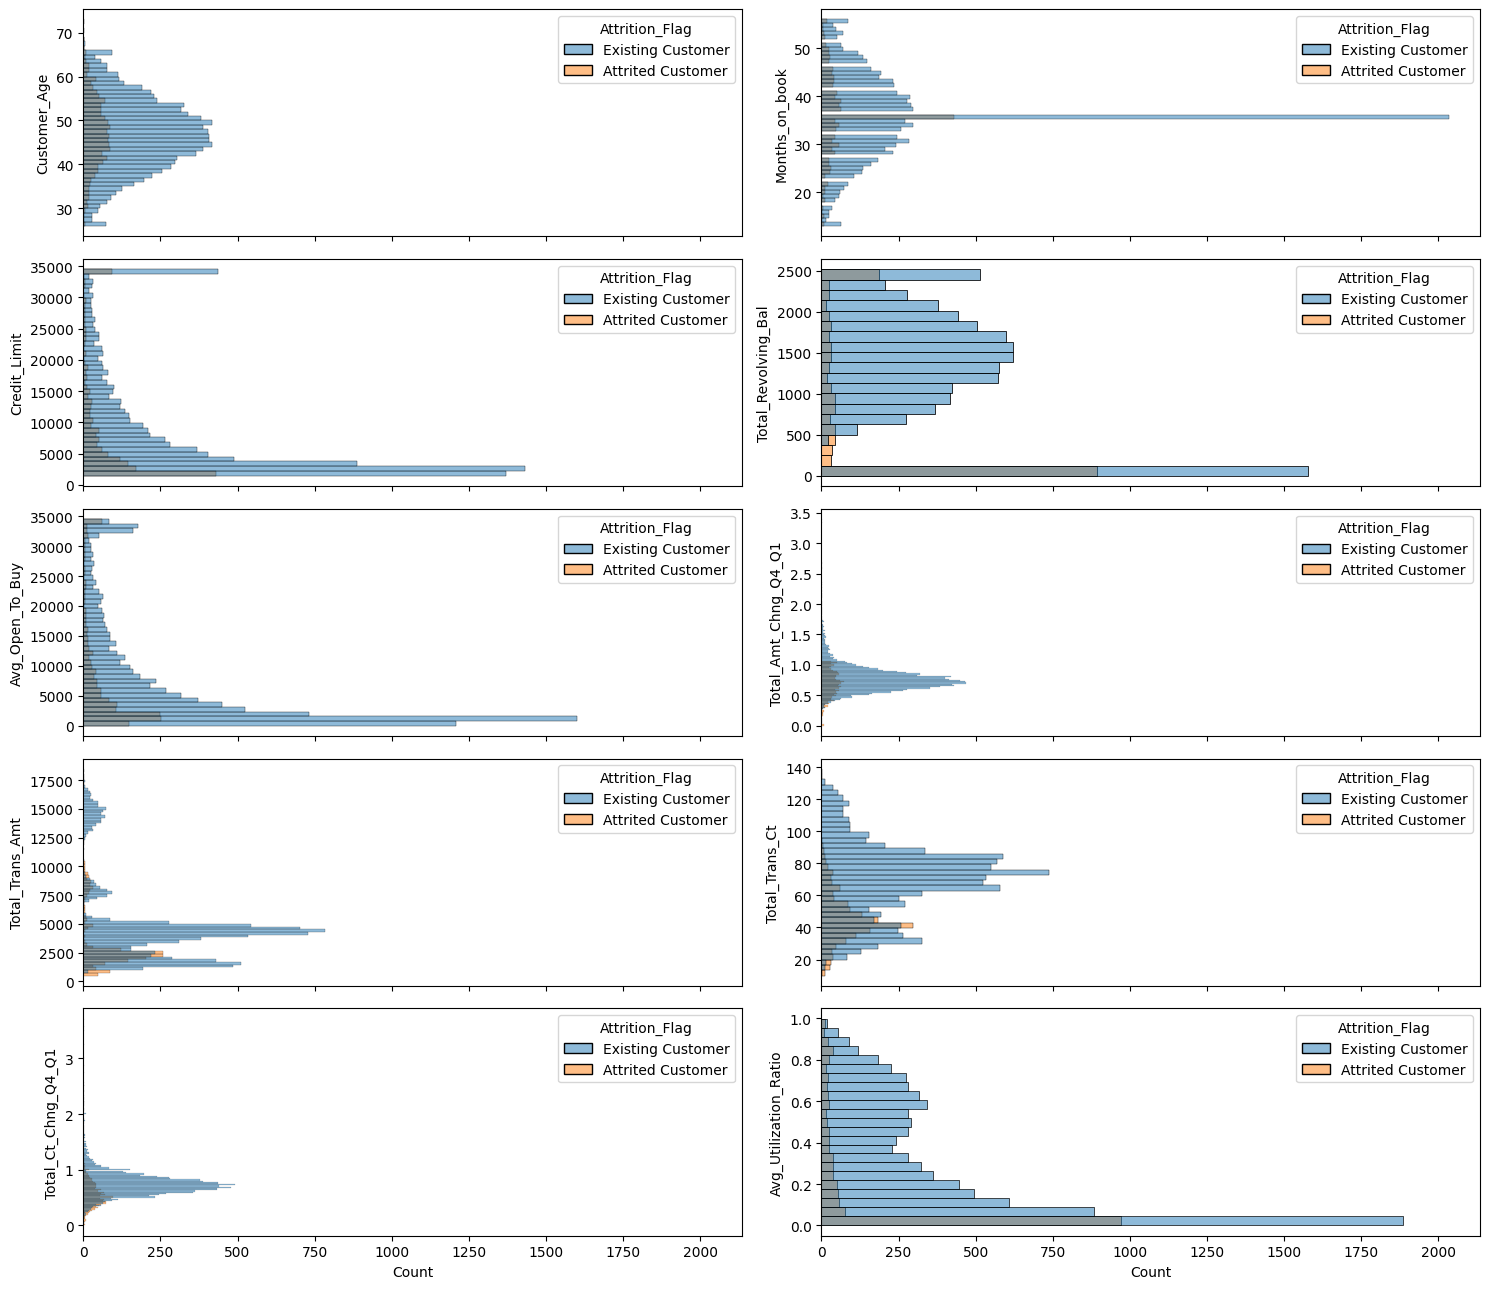

In [12]:
fig, axes = plt.subplots(5, 2, figsize=(15,13), sharex=True)
axes=axes.flatten()
for ax, catplot in zip(axes, continuous_feature):
    sns.histplot(y=catplot, data=df, ax=ax, hue = "Attrition_Flag")

plt.tight_layout()  
plt.show()

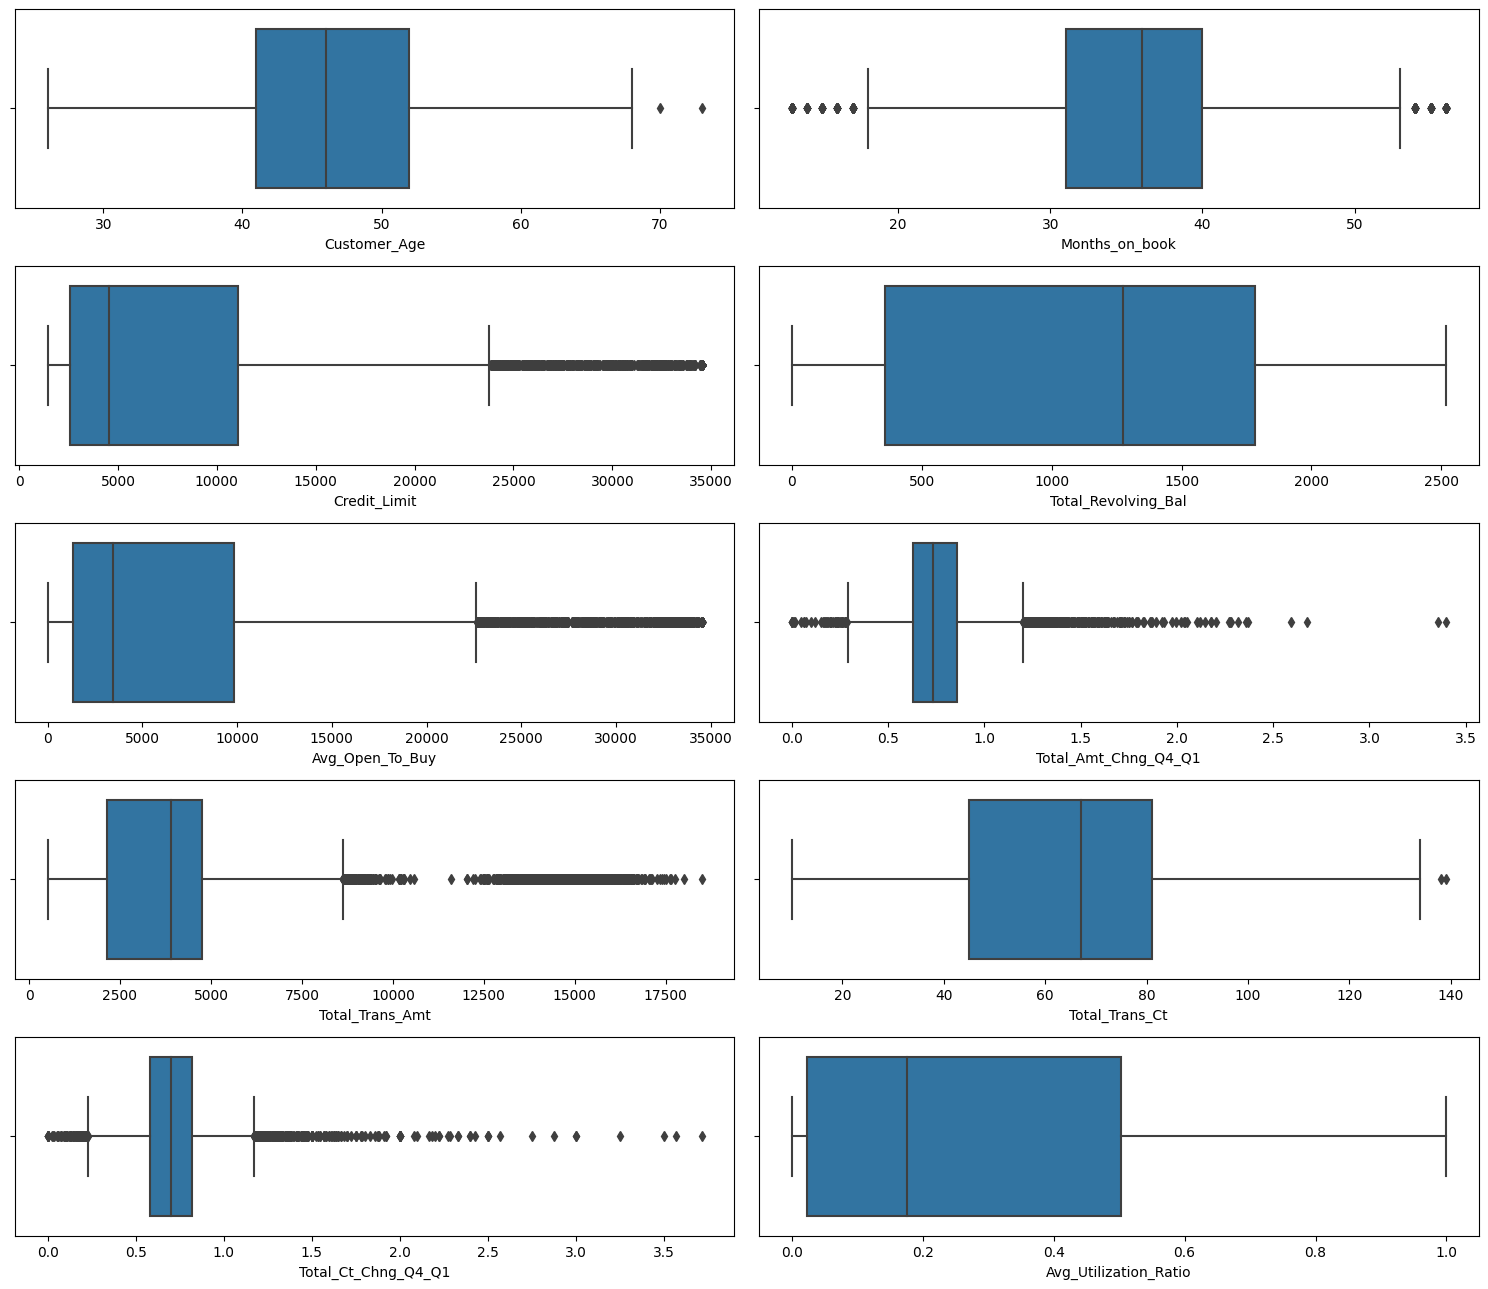

In [13]:
fig, axes = plt.subplots(5, 2, figsize=(15,13))
axes=axes.flatten()
for ax, catplot in zip(axes, continuous_feature):
    sns.boxplot(x=catplot, data=df, ax=ax)

plt.tight_layout()  
plt.show()

As our Continuous feature are very skewed by the distribution of histogram and with the help of Boxplot we also able to see outliers and skewedness but we won't be removing as they are making up big Chunk in our dataset. 
<p>Now let's take a look on discrete feature


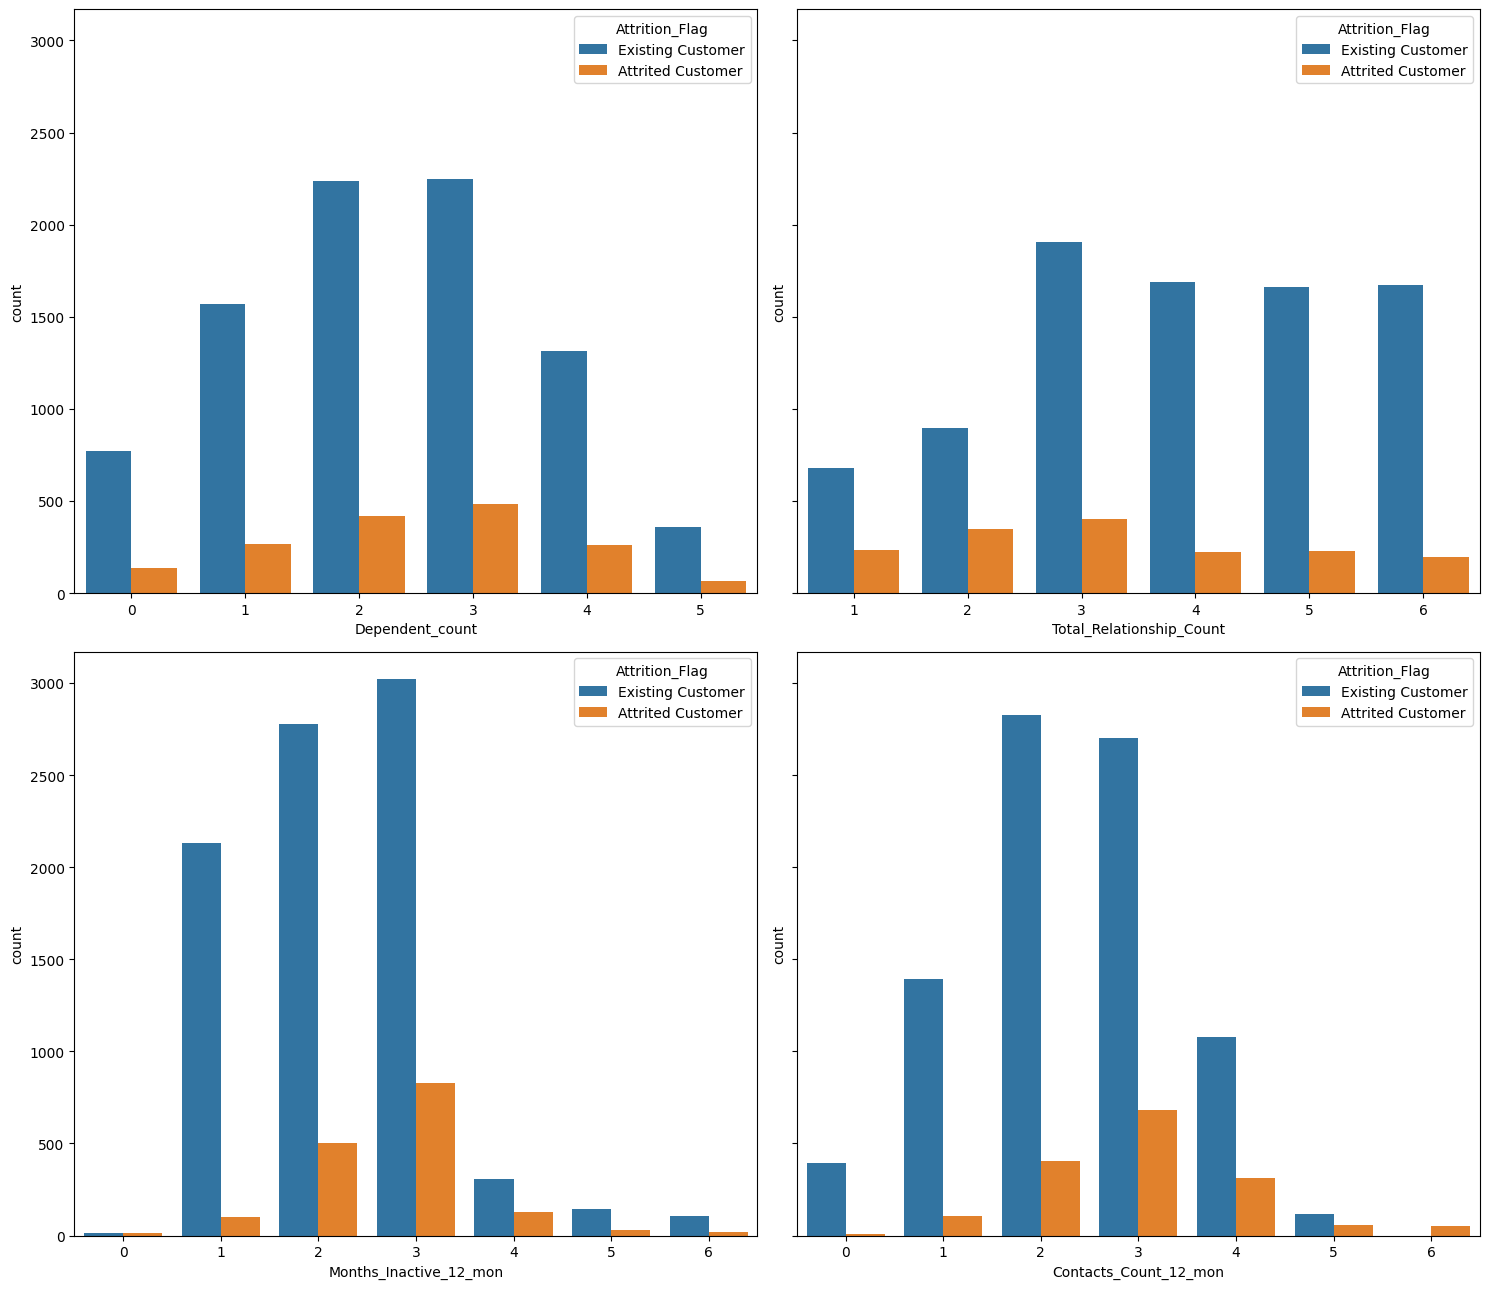

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(15,13), sharey=True)
axes = axes.flatten()
for ax, catplot in zip(axes, discrete_feature):
    sns.countplot(x=catplot, data=df, ax=ax, hue = "Attrition_Flag")

plt.tight_layout()  
plt.show()

## ANALYSIS OF CATEGORICAL FEATURES


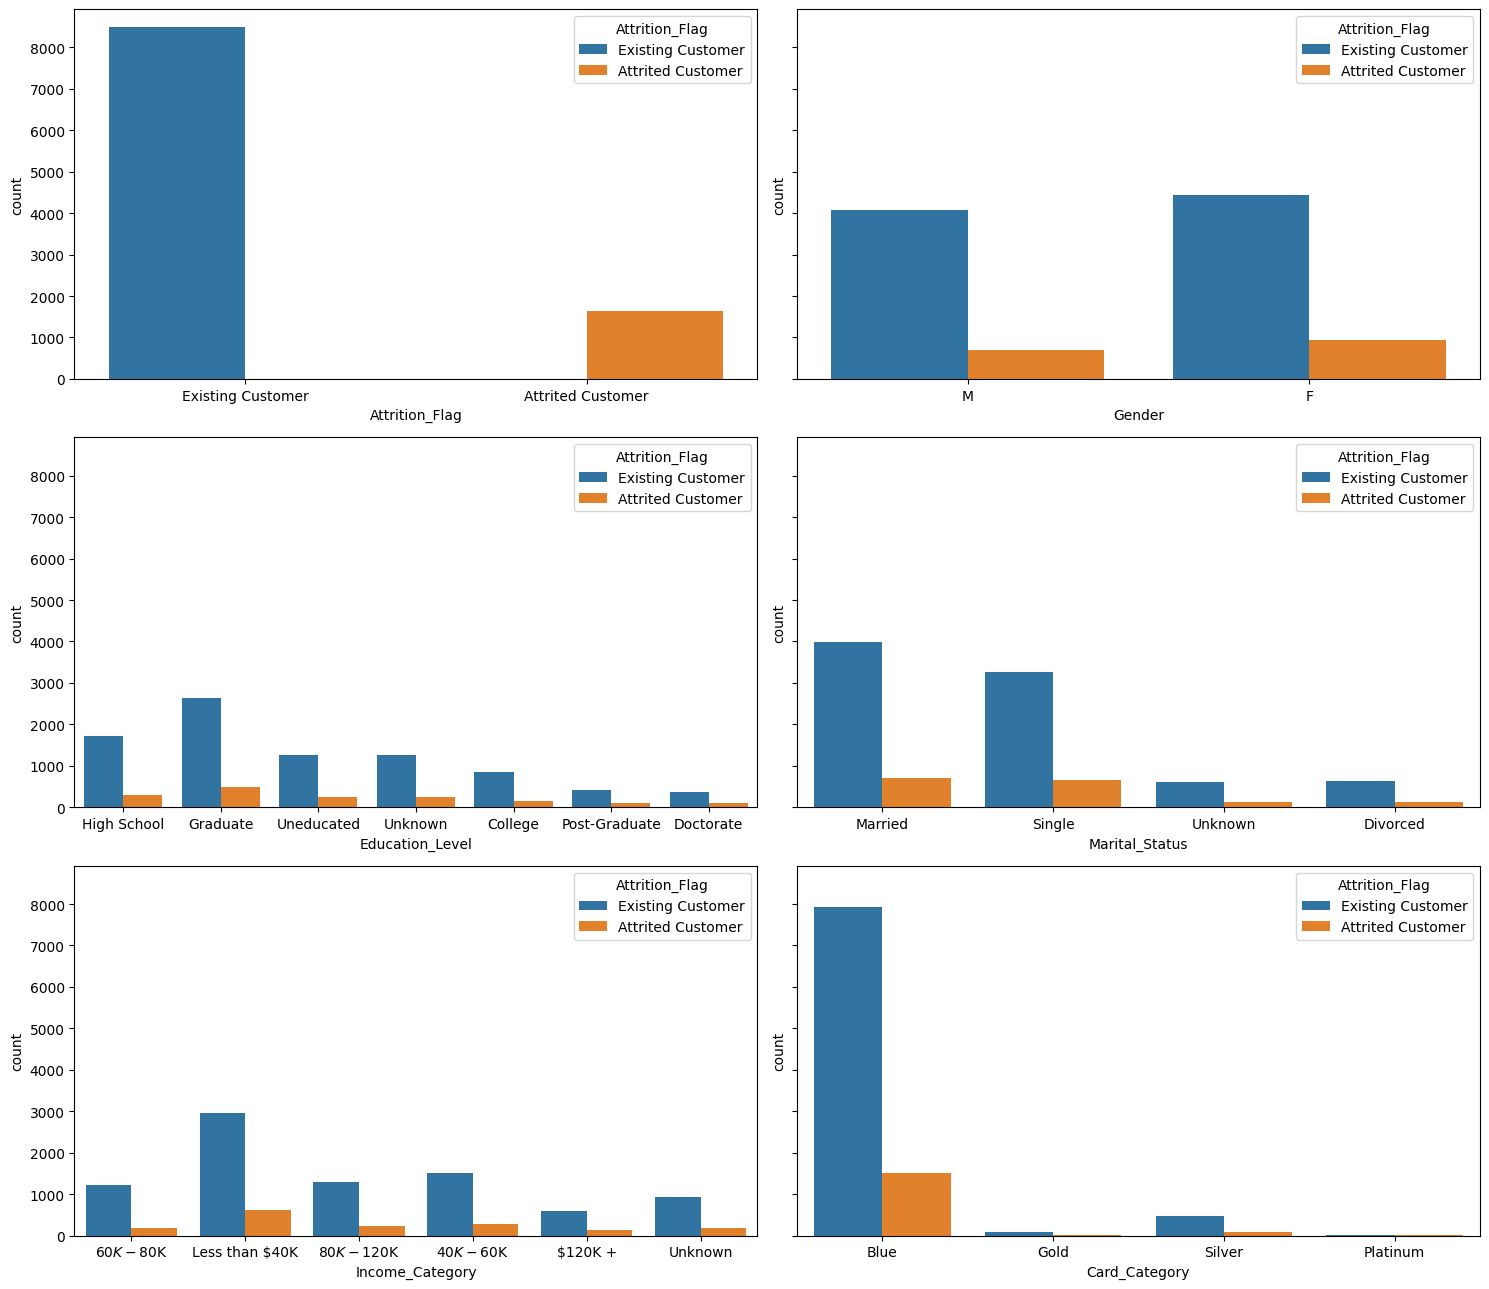

In [15]:
fig, axes = plt.subplots(3, 2, figsize=(15,13), sharey=True)
axes=axes.flatten()
for ax, catplot in zip(axes, categorical_feature):
    sns.countplot(x=catplot, data=df, ax=ax, hue = "Attrition_Flag") 
plt.tight_layout()  
plt.show()

#### Obervation we get from this:
1. As People are getting more educated, they are less likely to use credit card and their attrition count are also getting decreased.
2. People having income less than 40k have significantly higher attrition count.
3. People having Blue Credit are also having significantly higher attrition count.
4. Also our dataset is also imbalanced as Existing customer are much higher than Attrited customer, we will deal with this problem later in our study.

# STATISTICAL ANALYSIS

#### <p1>Now let's see how each features affect one another in our dataset.
        For this we will apply some statistical test:
        1. For Analysing categorical to categorical feature relationship, we will use Chi-squared test.
        2. For Analysis categorical to Numerical feature relationship, we will use One way anova.

## Chi squared test of independence

In [16]:
for feature in categorical_feature: 
    contigency= pd.crosstab(df[feature], df['Attrition_Flag']) 
    c, p, dof, expected = chi2_contingency(contigency) 
    print("{} and Attrition flag P value is {}".format(feature,p))

Attrition_Flag and Attrition flag P value is 0.0
Gender and Attrition flag P value is 0.00019635846717310307
Education_Level and Attrition flag P value is 0.05148913147336634
Marital_Status and Attrition flag P value is 0.10891263394840227
Income_Category and Attrition flag P value is 0.025002425704390617
Card_Category and Attrition flag P value is 0.5252382797994759


<p>For Gender and Income category P<0.05, then we reject our null hypothesis that Gender and attrition flag are independent. SO, Gender and Attrition are depend on each other.
<p> For Education level, marital Status and card category P>0.05, then we accept our null hypothesis that Card_Category and attrition flag are independent

## Anova Test

In [17]:
a = (df["Attrition_Flag"].map({"Existing Customer":0, "Attrited Customer":1}))

In [18]:
def calculateAnova(numVariable, catVariable=a):
    groupNumVariableByCatVariable1 = numVariable[catVariable==1] 
    groupNumVariableByCatVariable0 = numVariable[catVariable==0]
    # Calculate one way anova
    fValue, pValue = scipy.stats.f_oneway(groupNumVariableByCatVariable1, groupNumVariableByCatVariable0) 
    return f"Anova Result between {numVariable.name} & {catVariable.name}:  p=> {pValue}"

In [19]:
for feature in numerical_feature:
    print(calculateAnova(df[feature]))

Anova Result between Customer_Age & Attrition_Flag:  p=> 0.0669868850168818
Anova Result between Dependent_count & Attrition_Flag:  p=> 0.05600239253443362
Anova Result between Months_on_book & Attrition_Flag:  p=> 0.1684370287633549
Anova Result between Total_Relationship_Count & Attrition_Flag:  p=> 4.829281002128081e-52
Anova Result between Months_Inactive_12_mon & Attrition_Flag:  p=> 1.0326639995812652e-53
Anova Result between Contacts_Count_12_mon & Attrition_Flag:  p=> 4.697489630696143e-96
Anova Result between Credit_Limit & Attrition_Flag:  p=> 0.016285357205197453
Anova Result between Total_Revolving_Bal & Attrition_Flag:  p=> 6.630148455338936e-160
Anova Result between Avg_Open_To_Buy & Attrition_Flag:  p=> 0.9771160894377175
Anova Result between Total_Amt_Chng_Q4_Q1 & Attrition_Flag:  p=> 4.836642703531849e-40
Anova Result between Total_Trans_Amt & Attrition_Flag:  p=> 1.8574386556387076e-65
Anova Result between Total_Trans_Ct & Attrition_Flag:  p=> 0.0
Anova Result between

<p>Since p>0.05, we can say that Attrition chance is not statistically associated with customer Age, Months_Inactive_12_mon, Dependent_count, Avg_Open_To_Buy.
<p>For other feature which has p < 0.05 we state that we have a main interaction effect. This simply means that amongst the groups at least any of the group(or groups) means statistically significantly differ from one another

In [20]:
df["Attrition_Flag"] = df["Attrition_Flag"].map({"Existing Customer":0, "Attrited Customer":1})

## HEATMAP 

Now we will see features are correlated to one another.

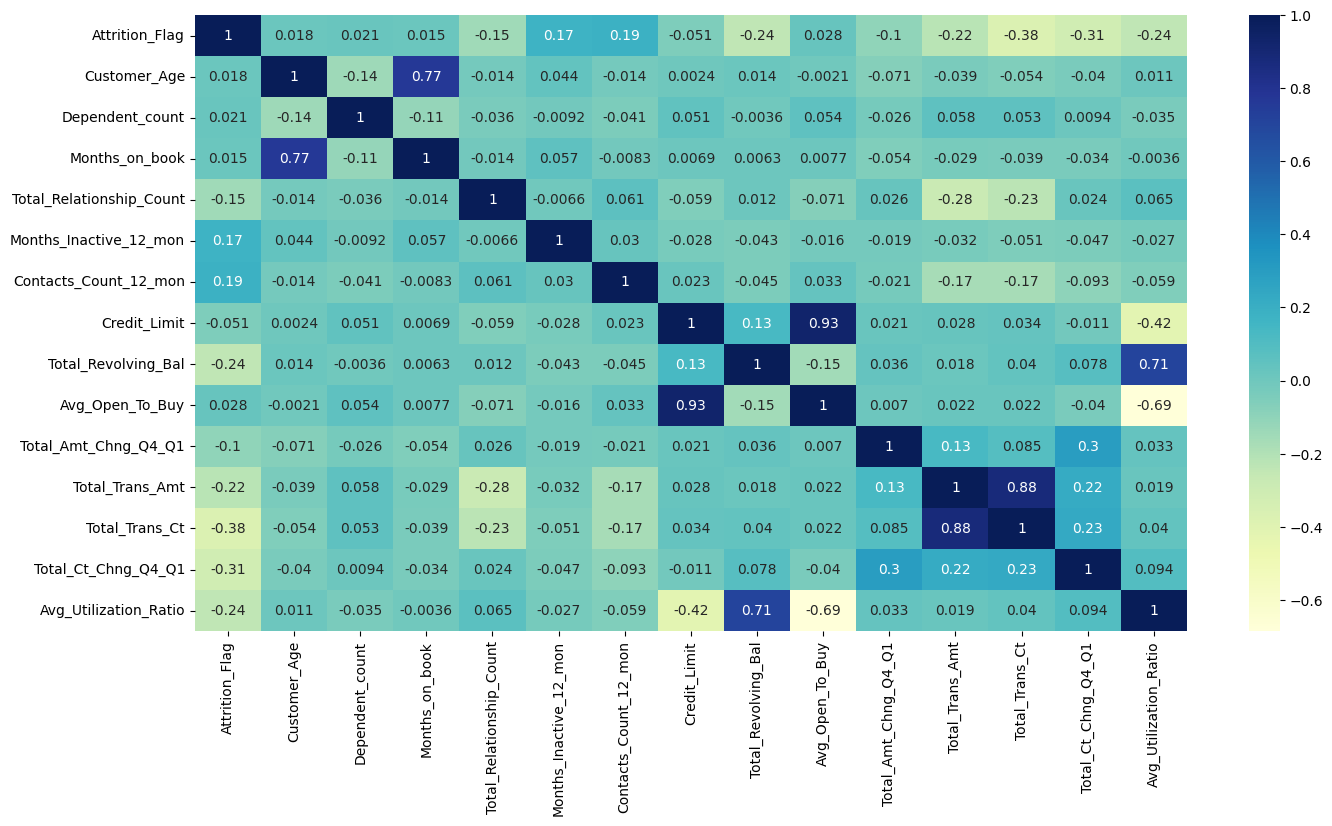

In [21]:
correlation = df.corr(method='spearman')

plt.figure(figsize = [16,8])
sns.heatmap(correlation, cmap="YlGnBu",annot = True)

plt.show()

### CONCLUSION FROM HEATMAP
In our dataset, We applied spearman correleation and these incites we have found:
1. Avg_Open_To_Buy and Credit limit has the most correlation (93%)
2. Followed by, Total_Ct_chng_Q4_Q1 and Total_Trans_Amt (88%) and Month_On_Book and Customer_Age (77%)
3. Total_Revolving_Bal and Avg_Open_To_Buy has close to 70% correlation with Avg_Utilization_Ratio
4. Compare to these all other correlation are not that signification

## Feature ENGINEERING

#### <p>Now let's convert our Categorical features in numerical features.
#### <p>In this case we will use one hot encoding

In [22]:
categorical_cols = list(df.select_dtypes("object"))

In [23]:
for feature in categorical_cols:
    dummy_feature = pd.get_dummies(df[feature], drop_first=True, prefix=feature)
    df = pd.concat([df,dummy_feature],axis=1)
    df.drop(columns=feature, inplace=True)

## SPLITTING ARE DATASET IN TRAINING AND TESTING DATA

We will divide are dataset in 20% for testing and 80% for training.

In [25]:
y = df.pop("Attrition_Flag")
X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=69)

##  FEATURE SCALING 

Now, we will scale our features so that every will be on same footing without giving importance to other features

In [27]:

scaler = MinMaxScaler()

X_scaled_train = scaler.fit_transform(X_train)

X_scaled_test = scaler.transform(X_test)

## SMOTE 

As our dataset is imbalanced to fix this issue we will use oversampling to get 50-50% Attrited and Existing Customer.

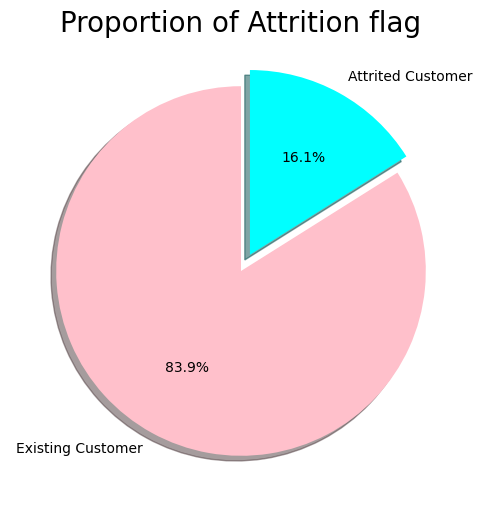

In [28]:
plt.figure(figsize = (6, 6))
plt.pie(y.value_counts(), labels = ['Existing Customer', 'Attrited Customer'], autopct='%1.1f%%', 
        explode = (0, 0.1), shadow = True, startangle = 90, colors = ['pink', 'cyan'])
plt.title('Proportion of Attrition flag', fontsize = 20)
plt.show()

In [29]:

sm = SMOTE(random_state = 69, sampling_strategy = 1.0)
                     
X_smote, y_smote = sm.fit_resample(X_train, y_train)
X_scaled_smote, y_scaled_smote = sm.fit_resample(X_scaled_train, y_train)

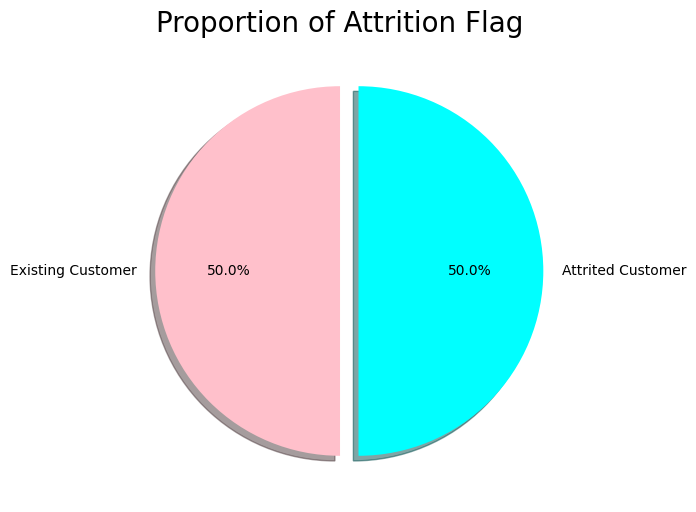

In [30]:
plt.figure(figsize = (6, 6))
plt.pie(y_smote.value_counts(), labels = ['Existing Customer', 'Attrited Customer'], autopct='%1.1f%%', 
        explode = (0, 0.1), shadow = True, startangle = 90, colors = ['pink', 'cyan'])
plt.title('Proportion of Attrition Flag', fontsize = 20)
plt.show()

We have store Smote features in Normalised dataset and Without Normalised dataset as some ML algorithm work better without Normalising. 

#### Now our Dataset is ready for applying Modelling.

# MODELLING

For Modelling our Dataset, we will apply 4 ML Model(Logistic regression, Decision Tree,KNN, Random Forest) and evaluating which one is performing well.

## LOGISTIC REGRESSION

Logistic regression is a statistical method that is used for building machine learning models where the dependent variable is dichotomous: i.e. binary. Logistic regression is used to describe data and the relationship between one dependent variable and one or more independent variables. The independent variables can be nominal, ordinal, or of interval type.

The name “logistic regression” is derived from the concept of the logistic function that it uses. The logistic function is also known as the sigmoid function. The value of this logistic function lies between zero and one.


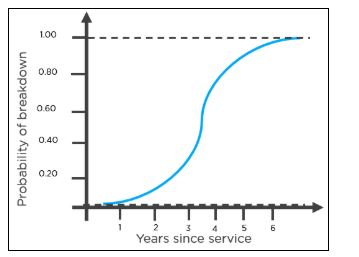

### HYPER PARAMETER OF LOGISTIC REGRESSION 

Logistic regression does not really have any critical hyperparameters to tune.

Sometimes, you can see useful differences in performance or convergence with different solvers (solver).

    solver in [‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]

Regularization (penalty) can sometimes be helpful.

    penalty in [‘none’, ‘l1’, ‘l2’, ‘elasticnet’]


The C parameter controls the penality strength, which can also be effective.

    C in [100, 10, 1.0, 0.1, 0.01]


In [31]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [32]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_scaled_smote, y_scaled_smote)

In [33]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.873479 using {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.872817 (0.010453) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.872817 (0.010453) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.872792 (0.010423) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.873258 (0.010108) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.873258 (0.010108) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.873087 (0.010154) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.873479 (0.010105) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.873479 (0.010105) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.873283 (0.009968) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.860622 (0.009414) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.860622 (0.009414) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.860499 (0.008504) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.816844 (0.009410) wit

Now,We have got best parameter we will use them to make our model.

In [34]:
logreg = LogisticRegression(C= 1.0, penalty = 'l2', solver = 'newton-cg', random_state=42)
logreg.fit(X_scaled_smote, y_scaled_smote)
y_pred_test = logreg.predict(X_scaled_test)

In [35]:


cm = confusion_matrix(y_test, y_pred_test)



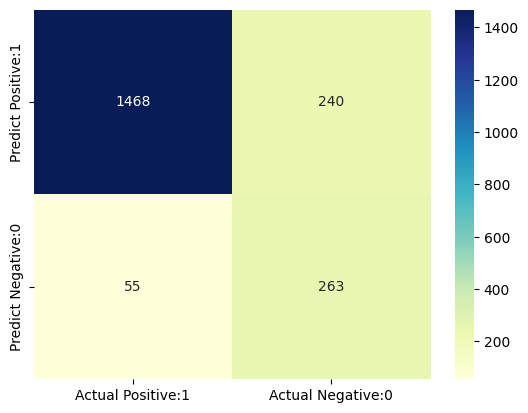

In [36]:

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [37]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1708
           1       0.52      0.83      0.64       318

    accuracy                           0.85      2026
   macro avg       0.74      0.84      0.77      2026
weighted avg       0.89      0.85      0.87      2026



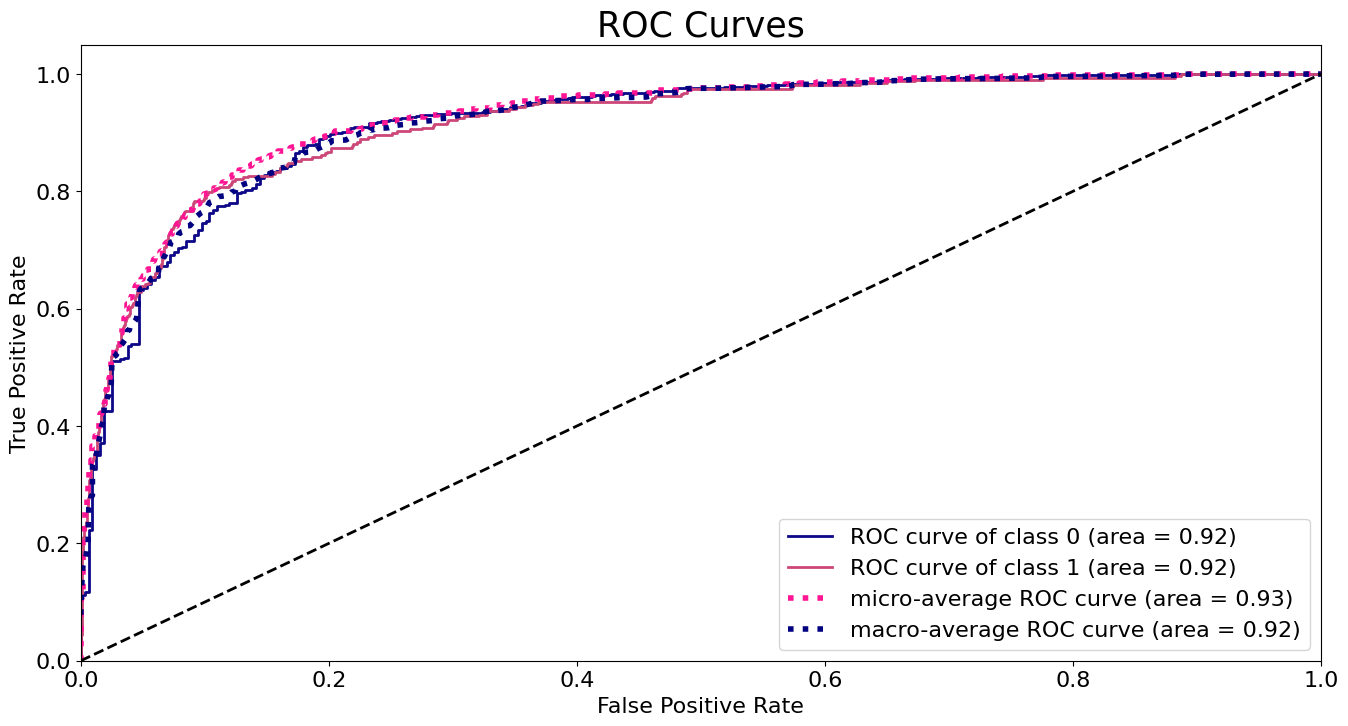

In [38]:
y_true = y_test 
y_probas = logreg.predict_proba(X_scaled_test) 

skplt.metrics.plot_roc(y_true, y_probas, figsize=(16,8), title_fontsize=25, text_fontsize=16, cmap='plasma')
plt.grid(False)
plt.show()

After applying Logistic regression model we are getting accuracy 85%

## KNN

<p> The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. While it can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another.
<p>For classification problems, a class label is assigned on the basis of a majority vote—i.e. the label that is most frequently represented around a given data point is used. While this is technically considered “plurality voting”, the term, “majority vote” is more commonly used in literature. The distinction between these terminologies is that “majority voting” technically requires a majority of greater than 50%, which primarily works when there are only two categories. 


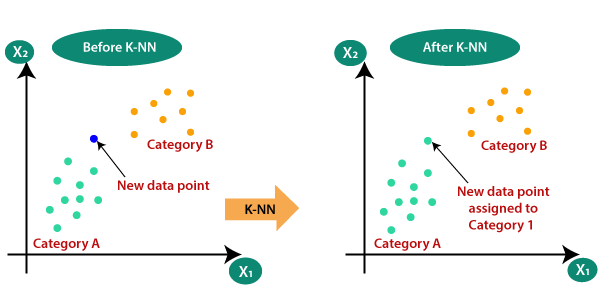

### HYPER PARAMETER OF KNN

The most important hyperparameter for KNN is the number of neighbors (n_neighbors).

Test values between at least 1 and 21, perhaps just the odd numbers.

    n_neighbors in [1 to 21]

It may also be interesting to test different distance metrics (metric) for choosing the composition of the neighborhood.

    metric in [‘euclidean’, ‘manhattan’, ‘minkowski’]

It may also be interesting to test the contribution of members of the neighborhood via different weightings (weights).

    weights in [‘uniform’, ‘distance’]


In [39]:
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_scaled_smote, y_scaled_smote)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.934630 using {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
0.919955 (0.005845) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.919955 (0.005845) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.882534 (0.006795) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.885380 (0.006655) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.857430 (0.008157) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.865700 (0.008055) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.840450 (0.009405) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.854437 (0.008919) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.828573 (0.009403) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.846977 (0.008584) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.820083 (

In [40]:
knn = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 1, weights = 'uniform')

In [41]:
knn.fit(X_scaled_smote, y_scaled_smote)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [42]:
y_pred_test1 = knn.predict(X_scaled_test)

In [43]:
cm = confusion_matrix(y_test, y_pred_test1)

<AxesSubplot: >

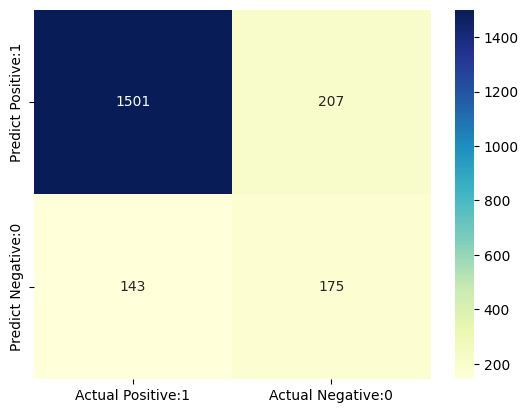

In [44]:

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [45]:
print(classification_report(y_test, y_pred_test1))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1708
           1       0.46      0.55      0.50       318

    accuracy                           0.83      2026
   macro avg       0.69      0.71      0.70      2026
weighted avg       0.84      0.83      0.83      2026



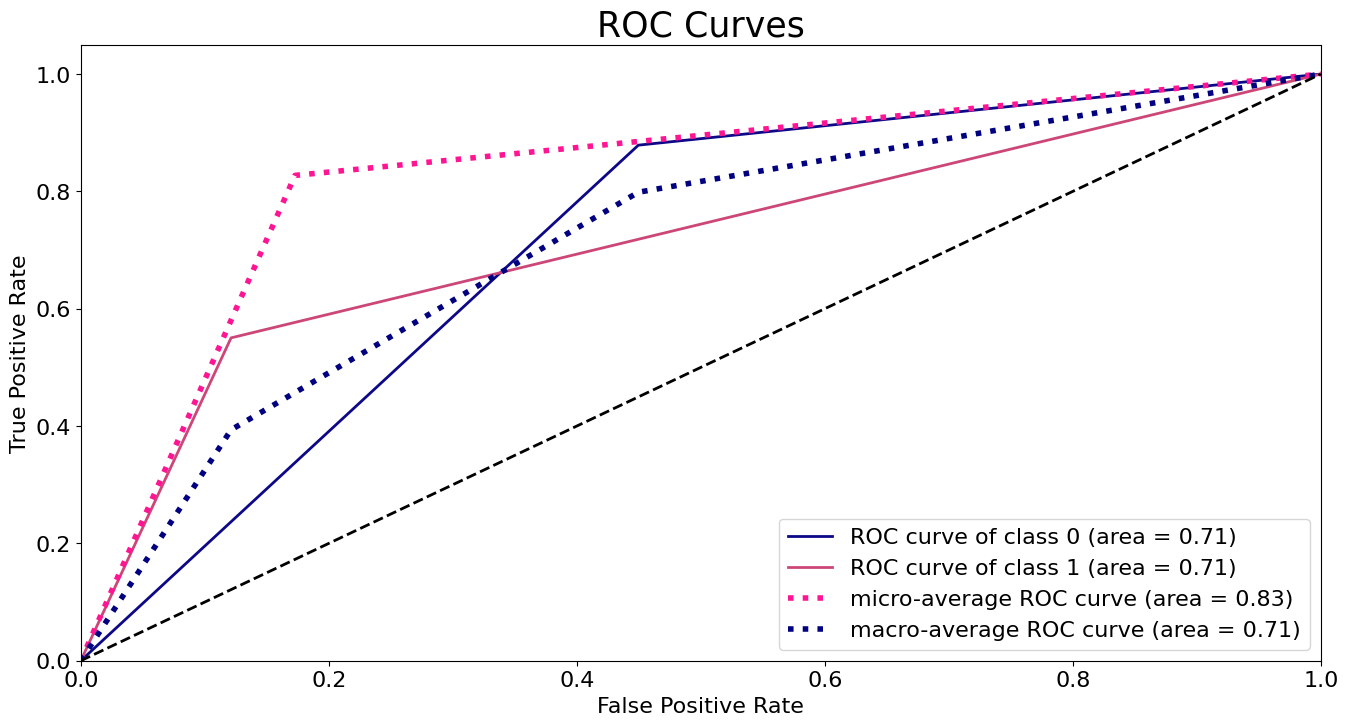

In [46]:
y_true = y_test 
y_probas = knn.predict_proba(X_scaled_test) 

skplt.metrics.plot_roc(y_true, y_probas, figsize=(16,8), title_fontsize=25, text_fontsize=16, cmap='plasma')
plt.grid(False)
plt.show()

These are the result that we are getting for KNN model

## DECISION TREE

<p>Decision Tree algorithm belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, the decision tree algorithm can be used for solving regression and classification problems too.

<p>The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).

<p>In Decision Trees, for predicting a class label for a record we start from the root of the tree. We compare the values of the root attribute with the record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node.

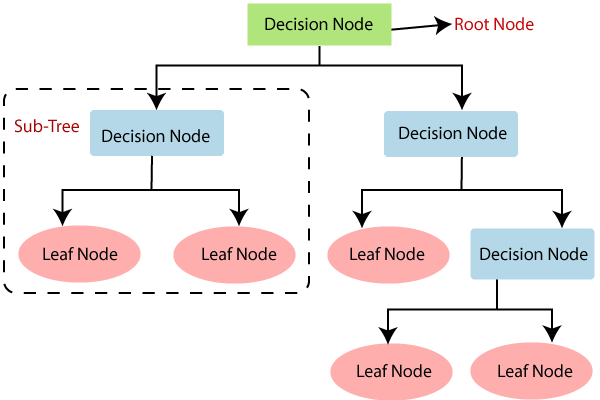

### HYPER PARAMETER OF DECISION TREES

<p>This argument represents the maximum depth of a tree. If not specified, the tree is expanded until the last leaf nodes contain a single value. Hence by reducing this meter, we can preclude the tree from learning all training samples thereby, preventing over-fitting.
<p> Minimum samples split decides or hold the value for the minimum number of samples necessary to split a nonterminal node.4
<p> Minimum sample leaf may sound like minimum sample split and is somewhat similar too. But in this case, we are talking about the minimum number of samples required to be left at the leaf node.


In [47]:
dt_hp = DecisionTreeClassifier(random_state=43)

params = {'max_depth':[3,5,7,10,15],
          'min_samples_leaf':[3,5,10,15,20],
          'min_samples_split':[8,10,12,18,20,16],
          'criterion':['gini','entropy']}
GS = GridSearchCV(estimator=dt_hp,param_grid=params,cv=5,n_jobs=-1, verbose=True, scoring='accuracy')

In [48]:
grid_result = GS.fit(X_smote, y_smote)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Best: 0.945010 using {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 16}
0.868448 (0.012467) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 8}
0.868448 (0.012467) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.868448 (0.012467) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 12}
0.868448 (0.012467) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 18}
0.868448 (0.012467) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 20}
0.868448 (0.012467) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 16}
0.868448 (0.012467) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 8}
0.868448 (0.012467) with: {'criterion': 'gi

In [49]:
clf = DecisionTreeClassifier(criterion= 'entropy', max_depth = 15, min_samples_leaf = 5, min_samples_split = 16)

clf.fit(X_smote, y_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       min_samples_split=16)

In [50]:
y_pred_ent = clf.predict(X_test)

In [51]:
cm = confusion_matrix(y_test, y_pred_ent)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1611   97]
 [  39  279]]


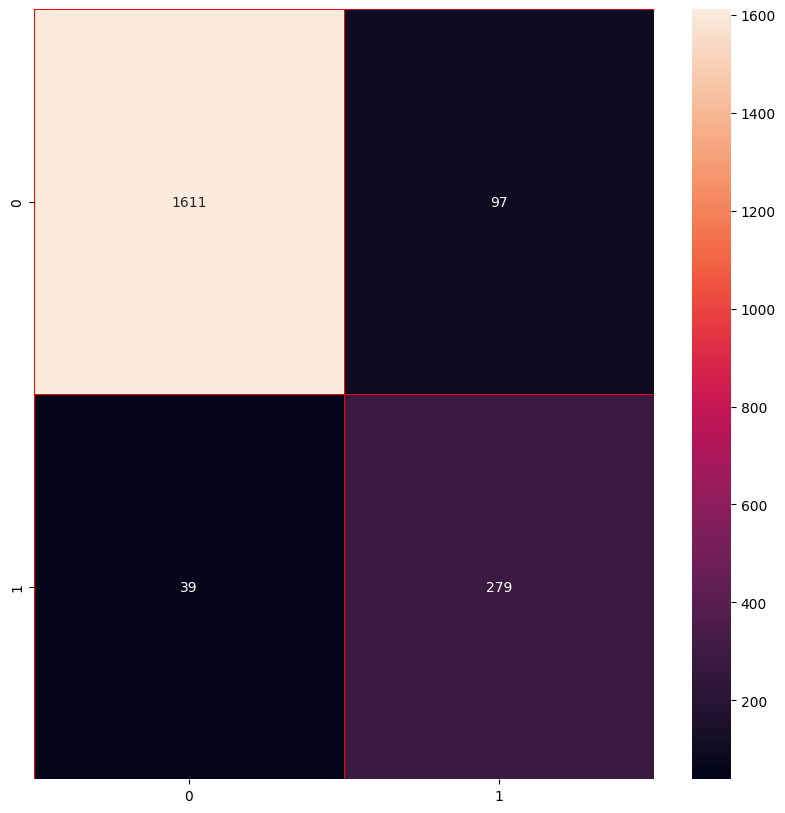

In [52]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()

In [53]:
print(classification_report(y_test, y_pred_ent))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1708
           1       0.74      0.88      0.80       318

    accuracy                           0.93      2026
   macro avg       0.86      0.91      0.88      2026
weighted avg       0.94      0.93      0.94      2026



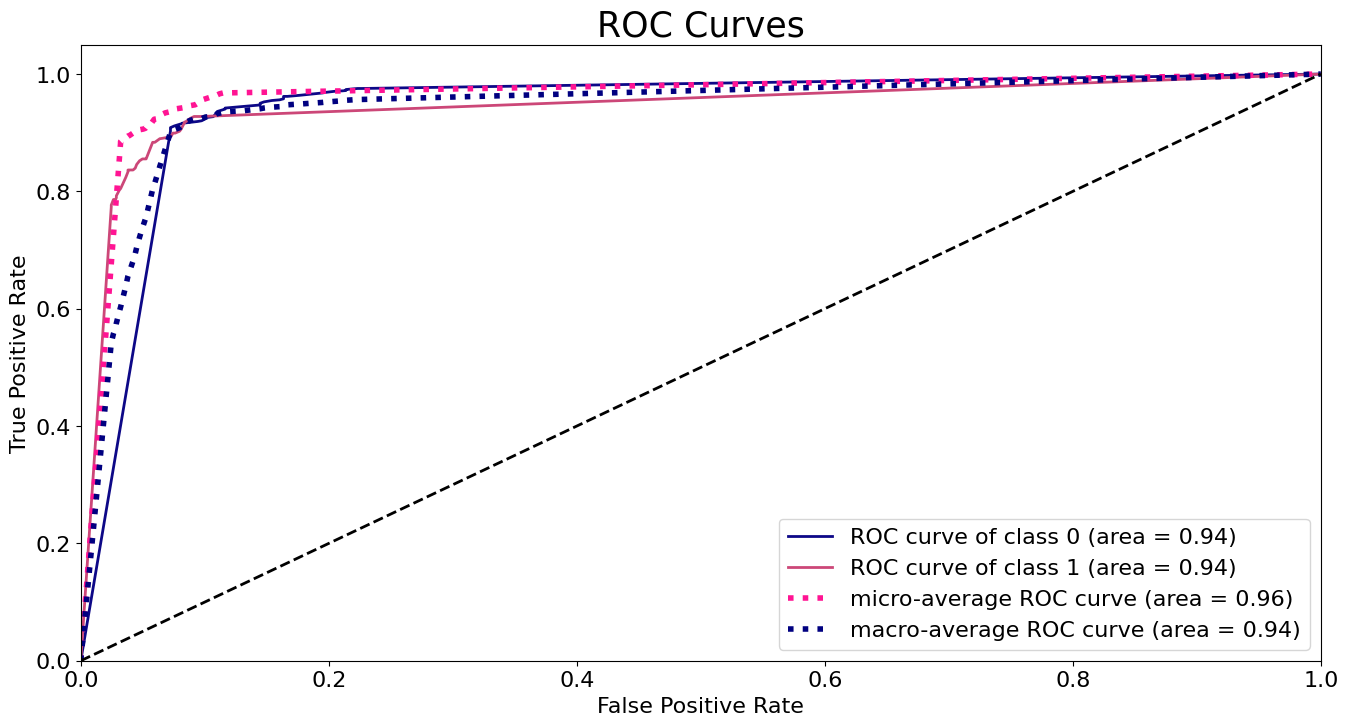

In [54]:
y_true = y_test 
y_probas = clf.predict_proba(X_test) 

skplt.metrics.plot_roc(y_true, y_probas, figsize=(16,8), title_fontsize=25, text_fontsize=16, cmap='plasma')
plt.grid(False)
plt.show()

For decision Tree model we are getting accuracy of 93% 

## Random FOREST

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction

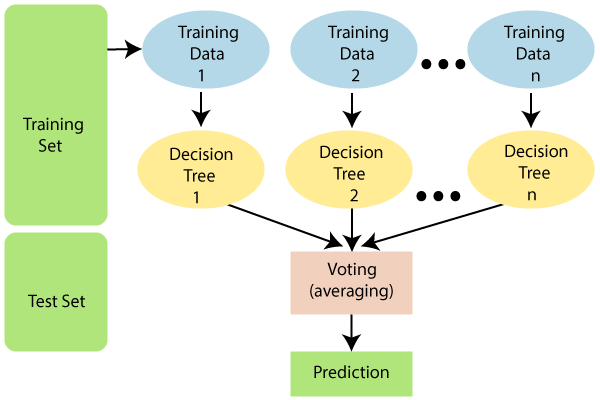

### HYPER PARAMETER OF RANDOM FOREST

The most important parameter is the number of random features to sample at each split point (max_features).

You could try a range of integer values, such as 1 to 20, or 1 to half the number of input features.

    max_features [1 to 20]

Alternately, you could try a suite of different default value calculators.

    max_features in [‘sqrt’, ‘log2’]

Another important parameter for random forest is the number of trees (n_estimators).

Ideally, this should be increased until no further improvement is seen in the model.

Good values might be a log scale from 10 to 1,000.

    n_estimators in [10, 100, 1000]


In [55]:
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_smote, y_smote)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.978970 using {'max_features': 'log2', 'n_estimators': 1000}
0.970137 (0.004764) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.978087 (0.004088) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.978480 (0.004097) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.968100 (0.005420) with: {'max_features': 'log2', 'n_estimators': 10}
0.978406 (0.003869) with: {'max_features': 'log2', 'n_estimators': 100}
0.978970 (0.003620) with: {'max_features': 'log2', 'n_estimators': 1000}


In [56]:
rf = RandomForestClassifier(max_features ='sqrt', n_estimators= 1000, random_state=42)

rf.fit(X_smote, y_smote)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [57]:
y_pred = rf.predict(X_test)

In [58]:
cm = confusion_matrix(y_test, y_pred)


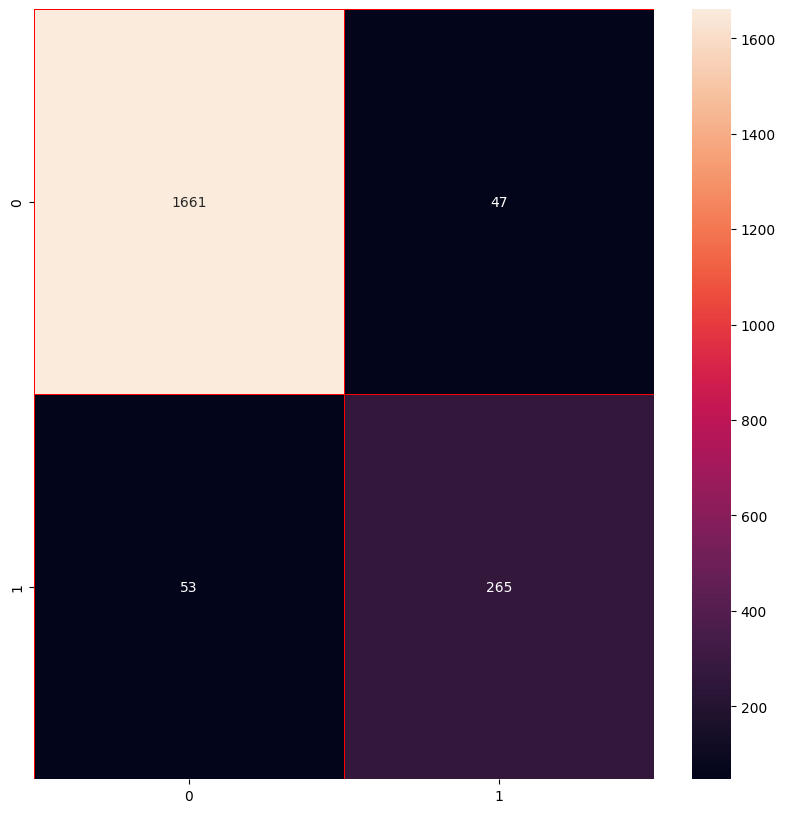

In [59]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1708
           1       0.85      0.83      0.84       318

    accuracy                           0.95      2026
   macro avg       0.91      0.90      0.91      2026
weighted avg       0.95      0.95      0.95      2026



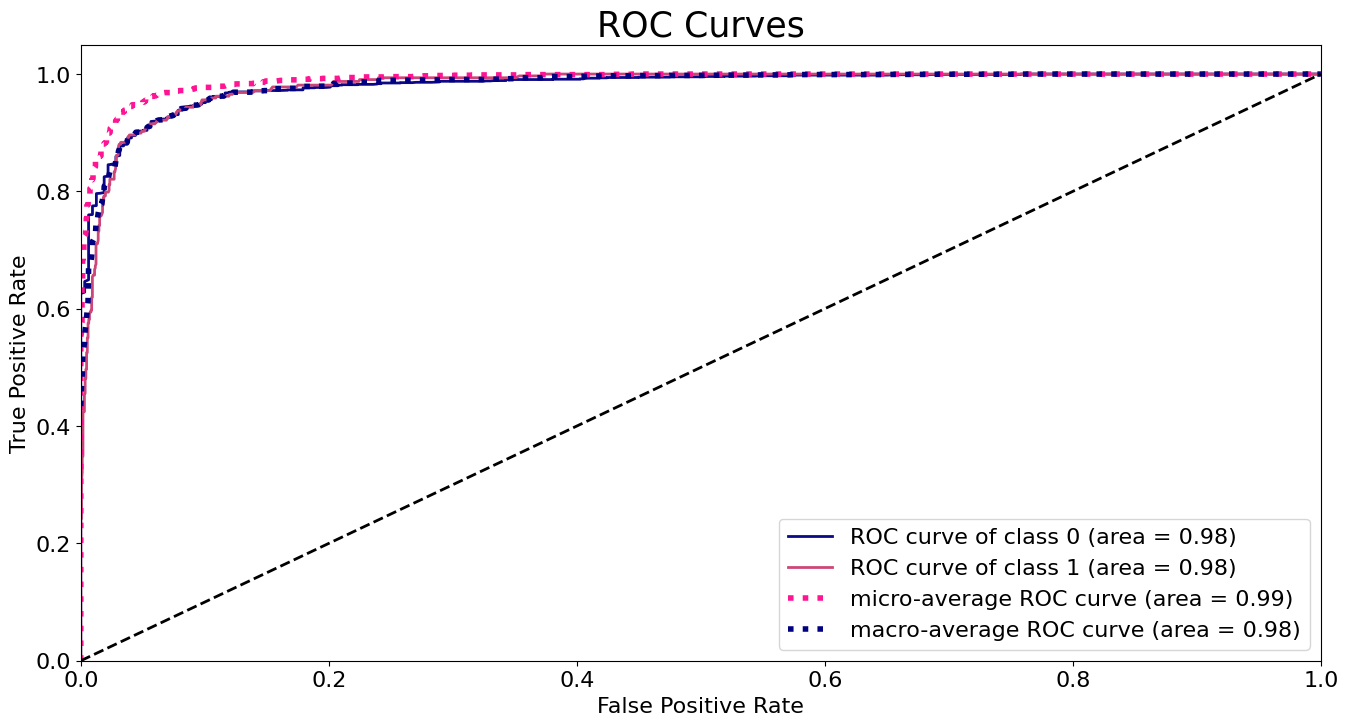

In [61]:
y_true = y_test 
y_probas = rf.predict_proba(X_test) 

skplt.metrics.plot_roc(y_true, y_probas, figsize=(16,8), title_fontsize=25, text_fontsize=16, cmap='plasma')
plt.grid(False)
plt.show()

For Random Forest model we are getting accuracy of 95% 

# MODEL SUMMARY

After evaluating all the Models we can conclude that Random Forest is performing well in all metrics.

## CONCLUSION

1. There are 16.07% of customers who have churned
2. Bank should focus on low income customers as from our analysis we concluded that they are more likely to attrited.
3. Blue card holder also have significantly higher attrition rate, Focusing on them will significantly improve attrition.
4. Churn prediction - Random Forest model created with around 95% accuracy to predict whether given customer will churn or not